## Import Required Libraries 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import json
import requests

from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer


## Data Import

### Bitcoin

In [3]:
df = pd.read_csv('Bitcoin_tweets.csv') 
df.head(5)


/Users/hanzallausman/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3146: DtypeWarning: Columns (4,5,6,7,12) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet
0,DeSota Wilson,"Atlanta, GA","Biz Consultant, real estate, fintech, startups...",2009-04-26 20:05:09,8534,7605,4838,False,2021-02-10 23:59:04,Blue Ridge Bank shares halted by NYSE after #b...,['bitcoin'],Twitter Web App,False
1,CryptoND,NaN,😎 BITCOINLIVE is a Dutch platform aimed at inf...,2019-10-17 20:12:10,6769,1532,25483,False,2021-02-10 23:58:48,"😎 Today, that's this #Thursday, we will do a ""...","['Thursday', 'Btc', 'wallet', 'security']",Twitter for Android,False
2,Tdlmatias,"London, England","IM Academy : The best #forex, #SelfEducation, ...",2014-11-10 10:50:37,128,332,924,False,2021-02-10 23:54:48,"Guys evening, I have read this article about B...",NaN,Twitter Web App,False
3,Crypto is the future,NaN,I will post a lot of buying signals for BTC tr...,2019-09-28 16:48:12,625,129,14,False,2021-02-10 23:54:33,$BTC A big chance in a billion! Price: \487264...,"['Bitcoin', 'FX', 'BTC', 'crypto']",dlvr.it,False
4,Alex Kirchmaier 🇦🇹🇸🇪 #FactsSuperspreader,Europa,Co-founder @RENJERJerky | Forbes 30Under30 | I...,2016-02-03 13:15:55,1249,1472,10482,False,2021-02-10 23:54:06,This network is secured by 9 508 nodes as of t...,['BTC'],Twitter Web App,False


In [214]:
df.tail(5)

,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet
3199994,Pitbull Trilyoneri,"İstanbul, Türkiye",NaN,2012-03-02 10:27:04,290,791,7252,False,2022-04-27,@eduardosurita Don't be late buy more $pit - #...,"['ForzaPitbull', 'PitbullCREW', 'PitbullTokenS...",Twitter for Android,False
3199995,Pitbull Trilyoneri,"İstanbul, Türkiye",NaN,2012-03-02 10:27:04,290,791,7252,False,2022-04-27,@eduardosurita Don't be late buy more $pit - #...,"['ForzaPitbull', 'PitbullCREW', 'PitbullTokenS...",Twitter for Android,False
3199996,Pitbull Trilyoneri,"İstanbul, Türkiye",NaN,2012-03-02 10:27:04,290,791,7252,False,2022-04-27,@eduardosurita Don't be late buy more $pit - #...,"['ForzaPitbull', 'PitbullCREW', 'PitbullTokenS...",Twitter for Android,False
3199997,Pitbull Trilyoneri,"İstanbul, Türkiye",NaN,2012-03-02 10:27:04,290,791,7252,False,2022-04-27,@eduardosurita Don't be late buy more $pit - #...,"['ForzaPitbull', 'PitbullCREW', 'PitbullTokenS...",Twitter for Android,False
3199998,Pitbull Trilyoneri,"İstanbul, Türkiye",NaN,2012-03-02 10:27:04,290,791,7252,False,2022-04-27,@eduardosurita Don't be late buy more $pit - #...,"['ForzaPitbull', 'PitbullCREW', 'PitbullTokenS...",Twitter for Android,False


### Preprocessing

In [ ]:
# Pre-processing the date column
df.date=df.date.str[0:10]

In [ ]:
# Dropping tweets that donot have a hashtags
df_nozeros = df.dropna(subset=['hashtags'])
    
# Resetting the index of the dataframe
df_nozeros=df_nozeros.reset_index(drop=True)


In [ ]:
# Defining Date Bounds for datasets

df_btc_jan_june_2021 = df_nozeros[(df_nozeros['date'] >= '2021-02-10') & (df_nozeros['date'] <= '2022-02-10')]
df_btc_jan_june_2021

In [ ]:
# Sentiment analysis of tweets 

analyzer = SentimentIntensityAnalyzer()

sentiment = []

for index, tweet in enumerate(df_btc_jan_june_2021['text']):
    score = analyzer.polarity_scores(tweet)
    sentiment.append(score['compound'])

df_btc_jan_june_2021['sentiment'] = sentiment

# df_btc_jan_june_2021

In [217]:
df_btc_jan_june_2021_sorted = df_btc_jan_june_2021.sort_values(by="date")
df_btc_jan_june_2021_sorted

,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet,sentiment
0,DeSota Wilson,"Atlanta, GA","Biz Consultant, real estate, fintech, startups...",2009-04-26 20:05:09,8534,7605,4838,False,2021-02-10,Blue Ridge Bank shares halted by NYSE after #b...,['bitcoin'],Twitter Web App,False,0.2960
1812,BTC DAILY MOTIVATION,Worldwide,I'm BTC Maximalist. Feel blessed w/ my origina...,2019-05-11 09:32:23,662,2192,1483,False,2021-02-10,"#originalquite #btcdailymotivation\n\n""XCHANGE...","['originalquite', 'btcdailymotivation']",Twitter Web App,False,0.0000
1813,CryptoCommunityPump,NaN,hey guys! join our crypto community! we vote t...,2021-02-08 10:15:26,68,5,1,False,2021-02-10,Checkout our pump group!🚀(LINK IN MY BIO)🚀 #xr...,"['xrp', 'xlm', 'btc', 'bitcoin', 'binance', 'e...",Twitter for iPhone,False,0.0000
1814,Ssamanthawilliams,NaN,Capital markets professional \nForeign exchang...,2021-02-07 21:09:06,16,357,217,False,2021-02-10,"Its time we embrace financial freedom, it's t...","['dogecoin', 'DogecoinToTheMoon', 'BTC', 'Free...",Twitter for Android,False,0.7579
1815,Makemoneyonline,NaN,Are you looking a way how to make money online...,2019-12-15 15:55:40,148,183,0,False,2021-02-10,Exchange crypto online — Cryptocurrency exchan...,"['bitcoin', 'bitcoins', 'bitcoinminer', 'bitco...",Bitly,False,0.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2251062,Crypto1o1,NaN,"#bitcoin Software Developer, Crypto Enthusiast",2009-09-13 16:09:57,104,112,203,False,2022-02-09,@DarkBeattwit @TheMoonCarl I would rather say:...,['bitcoin'],Twitter for iPhone,False,0.0000
2251061,Yennaro Suri ᅠᅠᅠᅠᅠᅠᅠᅠᅠᅠᅠᅠᅠᅠᅠᅠᅠᅠᅠᅠᅠᅠᅠᅠᅠᅠᅠᅠᅠᅠᅠᅠᅠ...,NaN,Fundamental Trader\n\nYou will live to see man...,2021-01-14 23:46:37,1559,217,1336,False,2022-02-09,10 trillion that could come to #Bitcoin https:...,['Bitcoin'],Twitter for Android,False,0.0000
2251060,PeloSwing🎯👸🏻,"Washington, DC",Options Trading Service🏛 Follow the Money 💰 *N...,2021-01-13 03:08:18,4953,1111,1048,False,2022-02-09,So $AAPL is getting behind #Bitcoin 🤔 https://...,['Bitcoin'],Twitter for iPhone,False,0.0000
2251058,Daily Star,London,Home of Fun Stuff! Follow @StarBreaksNews to b...,2009-02-09 15:45:17,218022,3530,911,True,2022-02-09,Crocodile of Wall Street who 'laundered £3bn' ...,['Bitcoin'],TweetDeck,False,-0.6249


In [ ]:
# date_sentiment_df = df_btc_jan_june_2021.groupby('date')
date_sentiment_df_mean = df_btc_jan_june_2021.groupby('date').mean()
date_sentiment_df_mean = date_sentiment_df_mean.to_dict()
dates_list = list(date_sentiment_df_mean['sentiment'].keys())
avg_values_list = list(date_sentiment_df_mean['sentiment'].values())

# dates_list: contains the corresponding dates for general market sentiments
# avg_values_list: general market sentiment

### Dogecoin

In [98]:
doge_df = pd.read_csv('doge_tweets.csv') 
doge_df.tail(5)

/Users/hanzallausman/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3146: DtypeWarning: Columns (0,1,2,10,22,23) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,Unnamed: 0,id,conversation_id,created_at,date,time,timezone,user_id,username,name,...,geo,source,user_rt_id,user_rt,retweet_id,reply_to,retweet_date,translate,trans_src,trans_dest
3670028,3421340,1344795651448602624,1344795651448602624,2021-01-01 00:00:43+00:00,2021-01-01,16:00:43,-700.0,8.436975e+17,futurestracker,Binance Futures Tracker,...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
3670029,3421341,1344795620201164800,1344795620201164800,2021-01-01 00:00:35+00:00,2021-01-01,16:00:35,-700.0,2.326903e+09,doge_bot,Dogebot,...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
3670030,3421342,1344795594636849155,1344793981201375233,2021-01-01 00:00:29+00:00,2021-01-01,16:00:29,-700.0,1.243285e+18,francisidiegbe,frank,...,NaN,NaN,NaN,NaN,NaN,"[{'screen_name': 'dogecoin', 'name': 'Dogecoin...",NaN,NaN,NaN,NaN
3670031,3421343,1344795507881893888,1344795507881893888,2021-01-01 00:00:08+00:00,2021-01-01,16:00:08,-700.0,1.194432e+09,littleprincejd,MainStreet₿itcoin (MSB)👑,...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
3670032,3421344,1344795477296996352,1344795477296996352,2021-01-01 00:00:01+00:00,2021-01-01,16:00:01,-700.0,2.232369e+09,dogecoinvalue,Dogecoin (DOGE) Value 🐕,...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN


#### Preprocessing

In [104]:
sub_doge_df = doge_df[['date', 'tweet']]
sub_doge_df = sub_doge_df.dropna(subset=['date', 'tweet'])
sub_doge_df.head(5)


,date,tweet
0,2021-04-28,The current value of 1 DOGE in USD is: $0.3236...
1,2021-04-28,"@OldManMitchell1 Agreed, many look at this met..."
2,2021-04-28,@RomainLanery Le doge est un enfant de cœur à ...
3,2021-04-28,Ty @elonmusk!!! Learn how to pronounce it @mcu...
4,2021-04-28,Checking doge coin seeing if ur rich yet 👀


In [110]:
sub_doge_df = sub_doge_df.sort_values(by="date")
sub_doge_df = sub_doge_df[sub_doge_df.tweet != 'False']
sub_doge_df=sub_doge_df.reset_index(drop=True)

sub_doge_df.tail(5)

,date,tweet
3662757,2021-04-28,trying to convince everyone I know to buy #dog...
3662758,2021-04-28,"@harumenes @handokotjung doge, sol, xrp, ankr ..."
3662759,2021-04-28,Over here watching Doge creep back up like ht...
3662760,2021-04-28,@heyyy_reyna @suchHODL No worries. You misread...
3662761,2021-04-28,@abovewallstreet @bholman24930782 @Chuy338 @TC...


In [ ]:
# Sentiment analysis of tweets 

doge_analyzer = SentimentIntensityAnalyzer()

doge_sentiment = []

for index, tweet in enumerate(sub_doge_df['tweet']):
    score = {'compound':0}
    try:
        score = doge_analyzer.polarity_scores(tweet)
    except:
        print("An exception occured")
    doge_sentiment.append(score['compound'])
    # just to get feedback on progress
    if index%100000 == 0:
        print("hello: ", index)

sub_doge_df['sentiment'] = doge_sentiment



In [129]:
sub_doge_df.tail(20)

,date,tweet,sentiment
3662742,2021-04-28,Si fuera por mi metamos el deposito de las AFP...,0.0000
3662743,2021-04-28,@_Slumpeddd @RishabJ20326837 @elonmusk With Bi...,0.9313
3662744,2021-04-28,@bholman24930782 @GrandmaGunmetal @james808332...,0.7579
3662745,2021-04-28,do you like the idea of earning and spending #...,0.5106
3662746,2021-04-28,@ALOSTATH2017 طويل العمر تتوقع DOGE راح يكمل ي...,0.0000
3662747,2021-04-28,@TCMATT0515 @revolt_tyranny @dogebloke @DogeAr...,0.7950
3662748,2021-04-28,$SOL $SAMO $DOGE #meme #memecoin #solana #FTX ...,0.0000
3662749,2021-04-28,"@DogeCoinCoach If you took the Vaccine shot, t...",0.0000
3662750,2021-04-28,#giftidea #dogeday #dogecoin #deal #gift #gift...,0.5574
3662751,2021-04-28,Just convince my gas station clerk to sell bit...,-0.5647


In [ ]:
sub_doge_df_mean = sub_doge_df.groupby('date').mean()

sub_doge_df_mean = sub_doge_df_mean.to_dict()
doge_dates = list(sub_doge_df_mean['sentiment'].keys())
doge_values = list(sub_doge_df_mean['sentiment'].values())

# doge_dates: contains date values for which we have general market sentiment

#### Get crypto prices for respective dates

In [33]:
import time
import datetime
import matplotlib.pyplot as plt 

def getcryptoPrice(cryptoSym,endDate, numOfDays):
    timeStamp = time.mktime(datetime.datetime.strptime(endDate,"%d-%m-%Y").timetuple())
    url = "https://min-api.cryptocompare.com/data/histoday?fsym="+cryptoSym+"&tsym=USD"+"&limit="+numOfDays+"&toTs="+str(timeStamp)
    response = requests.get(url)
    resJson = response.json()
    
    df = pd.DataFrame(resJson['Data'])
    df['timestamp'] = [datetime.datetime.fromtimestamp(d) for d in df.time]
    df['timestamp'] = df['timestamp'].dt.date
    return df



In [265]:
# for bitcoin: 364 days from feb 10 2021 to feb 09 2022
df_coin = getcryptoPrice('BTC',"10-02-2022","364")

coin_price_time = df_coin.groupby('timestamp').mean()
coin_price_date = coin_price_time.to_dict()
coin_price_date = coin_price_date['time'].keys()
time_list_2 = []

for i in coin_price_date:
    temp = i.strftime('%Y-%m-%d')
    time_list_2.append(temp)

# time_list_2


In [ ]:
# get crypto prices for dogecoin
df_doge_coin = getcryptoPrice('DOGE',"29-04-2021","117")

doge_price_time = df_doge_coin.groupby('timestamp').mean()
doge_price_date = doge_price_time.to_dict()
doge_price_date = doge_price_date['time'].keys()
doge_time_list = []

for i in doge_price_date:
    temp = i.strftime('%Y-%m-%d')
    doge_time_list.append(temp)

doge_time_list

## Plotting

In [ ]:
def getGraph(x1, x2, y1, y2, coinName):
    coin = coinName + "[$]"
    fig, ax1 = plt.subplots(figsize=(20,10))
    ax1.set_title("Crypto Currency vs Twitter Sentiment", fontsize=18)
    ax1.tick_params(labelsize=10)
    ax2 = ax1.twinx()
    ax1.plot_date(x1, y1, 'g-')
    ax2.plot_date(x2, y2, 'b-')
    ax1.set_ylabel("Sentiment", color='g', fontsize=16)
    ax2.set_ylabel(coin, color='b', fontsize=16)
    plt.savefig('sentiment.png', dpi=100)
    plt.show()
    

### Bitcoin vs Sentiment

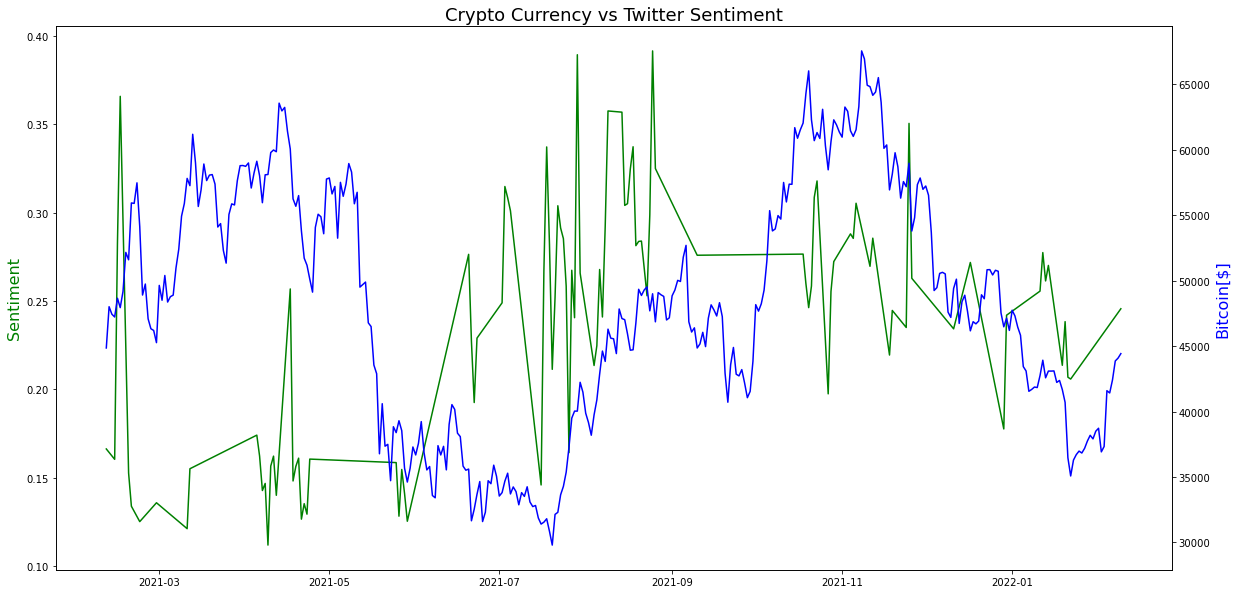

In [266]:
# Graph Plotting

getGraph(pd.to_datetime(dates_list),pd.to_datetime(time_list_2), avg_values_list,  df_coin['close'], "Bitcoin")

### Dogecoin vs Sentiment

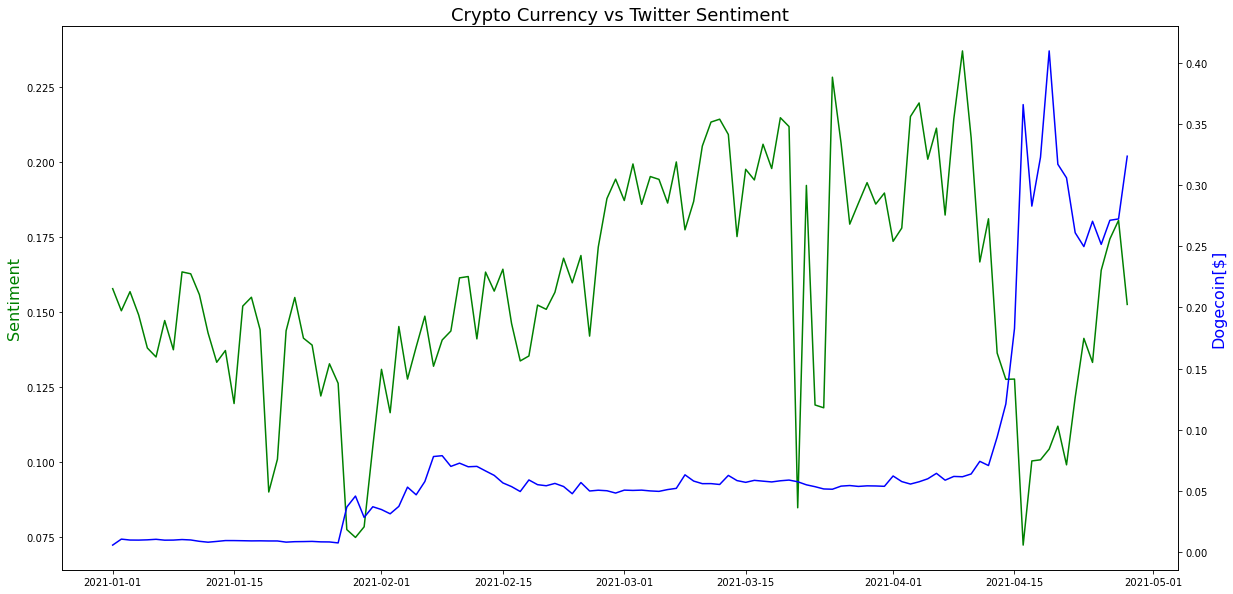

In [267]:
# Graph Plotting Doge Coin

getGraph(pd.to_datetime(doge_time_list),pd.to_datetime(doge_time_list), doge_values,  df_doge_coin['close'], "Dogecoin")

### Data Analysis

In [268]:
def crosscorr(x, y, lag = 0):
    temp = x.corrwith(y.shift(lag), method="pearson")
#     print(temp)
    return temp

def co_var_graph(sentiment, price):
    # Co-variance graph
    xcov = [crosscorr(pd.DataFrame(sentiment), (price), lag = i) for i in range(-20,20)]
    plt.plot(range(-20,20), xcov)
    plt.title("Pearson Cross-Correlation")
    plt.xlabel("Lag")
    plt.ylabel("Correlation")
    plt.savefig('var_graph.png', dpi=100)
    plt.show()
    

In [270]:
# for bitcoin: only getting data for the available sentiment score dates
btcValue2 = []
for i in date_sentiment_df_mean.values():
    thiskey = i.keys()
    for j in thiskey:
        for index, k in (df_coin.iterrows()):
            if pd.to_datetime(j) == k['timestamp']:
                btcValue2.append(k['close'])
            

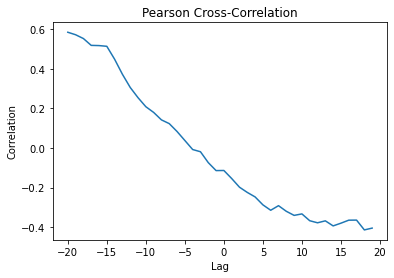

In [273]:
# Bitcoin vs Sentiment co-relation
# sentiment dates: date_sentiment_df_mean
# time and price: df_coin

co_var_graph(avg_values_list,  pd.DataFrame(btcValue2))

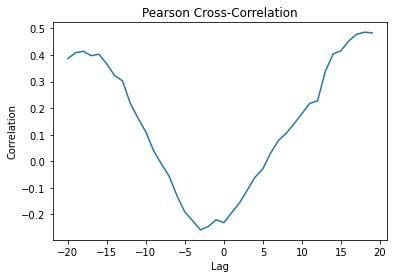

In [272]:
# Dogecoin vs Sentiment co-relation
co_var_graph(doge_values, df_doge_coin['close'])